# Clothes Size Prediction

#### Import Relevant Libraries

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import autoreload
import missingno as msno
import math
import os
import sys
import csv

from collections import defaultdict, Counter
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline
%reload_ext autoreload
%autoreload 2

pd.set_option("display.max_row", 100)
pd.set_option("display.max_column", 100)

sb.set_style("darkgrid")
sb.set()

#### Data Collection and Loading

In [84]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Clothes-Size-Prediction\final_test.csv")
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


#### Data Statistics

In [85]:
df.shape

(119734, 4)

In [86]:
df.describe(include="all").round()

,weight,age,height,size
count,119734.0,119477.0,119404.0,119734
unique,NaN,NaN,NaN,7
top,NaN,NaN,NaN,M
freq,NaN,NaN,NaN,29712
mean,62.0,34.0,166.0,NaN
std,10.0,8.0,7.0,NaN
min,22.0,0.0,137.0,NaN
25%,55.0,29.0,160.0,NaN
50%,61.0,32.0,165.0,NaN
75%,67.0,37.0,170.0,NaN


In [87]:
df.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

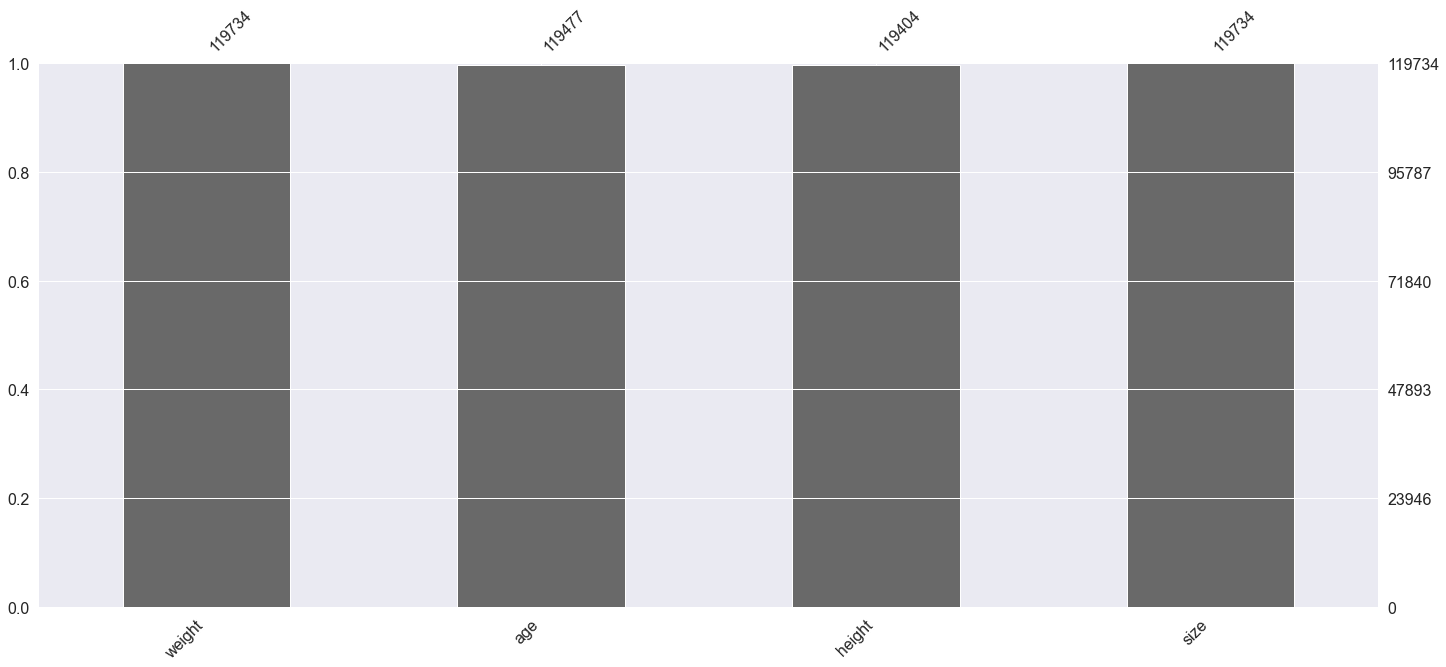

In [88]:
msno.bar(df)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [178]:
df["size"].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

Text(0, 0.5, 'Total Count')

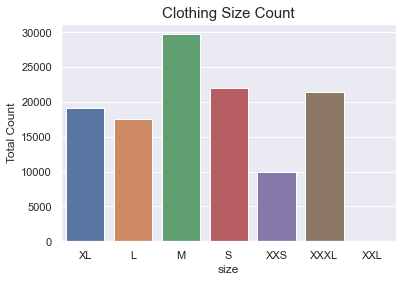

In [155]:
sb.countplot(df["size"])
plt.title("Clothing Size Count", fontsize=15)
plt.ylabel("Total Count")

Text(0.5, 1.0, 'Weight Distribution Plot')

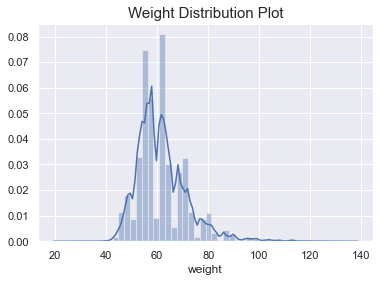

In [157]:
sb.distplot(df["weight"])
plt.title("Weight Distribution Plot", fontsize=15)

Text(0.5, 1.0, 'Height Distribution Plot')

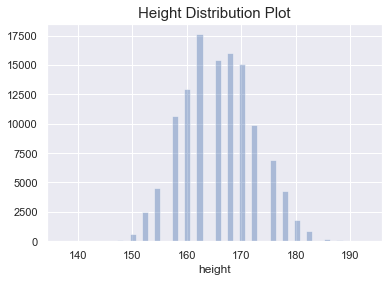

In [161]:
sb.distplot(df["height"], kde=False)
plt.title("Height Distribution Plot", fontsize=15)

Text(0.5, 1.0, 'Age Distribution Plot')

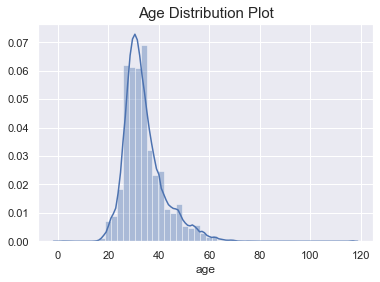

In [162]:
sb.distplot(df["age"])
plt.title("Age Distribution Plot", fontsize=15)

Text(0.5, 1.0, 'Weight Against Age Based on Size')

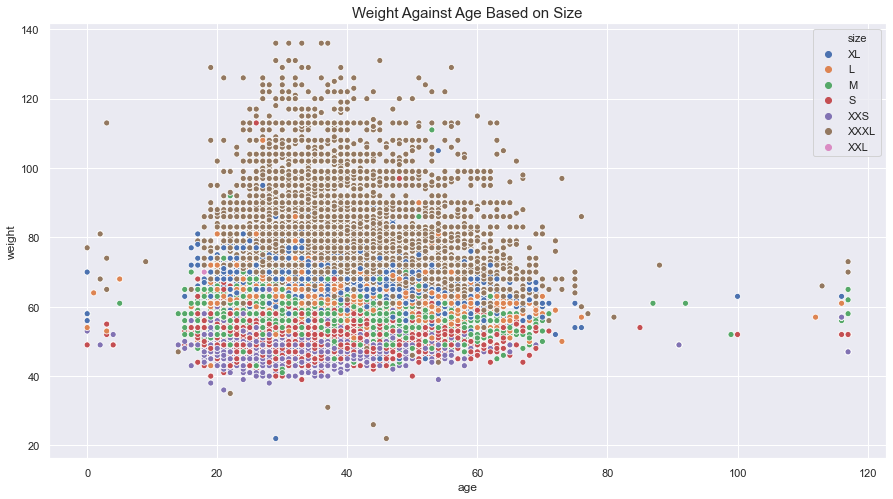

In [172]:
plt.figure(figsize = (15, 8))
sb.scatterplot(x = df["age"], y = df["weight"], hue = df["size"])
plt.title("Weight Against Age Based on Size", fontsize = 15)

In [202]:
size_grp = round(df.groupby("size").agg({"age": "mean", "weight": "mean"}).sort_values(by = "weight", ascending = False), 2)
size_grp

,age,weight
size,,
XXXL,36.41,75.94
XXL,36.30,66.38
XL,34.94,65.58
L,34.22,62.25
M,33.45,58.21
S,32.62,54.11
XXS,31.62,50.55


#### Data Cleaning

In [91]:
s_imp = SimpleImputer()

df[["age", "height"]] = s_imp.fit_transform(df[["age", "height"]])

In [92]:
df.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [93]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


#### Machine Learning and Predictions Analysis

In [94]:
le = LabelEncoder()

df["size_num"] = le.fit_transform(df["size"])

In [95]:
df.head()

,weight,age,height,size,size_num
0,62,28.0,172.72,XL,3
1,59,36.0,167.64,L,0
2,61,34.0,165.10,M,1
3,65,27.0,175.26,L,0
4,62,45.0,172.72,M,1


In [114]:
x = df.drop(columns = "size")

y = df["size"]

%time x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Wall time: 33 ms


In [115]:
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (95787, 4)
x_test (23947, 4)
y_train (95787,)
y_test (23947,)


#### Build and Evaluate Model

In [130]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

dt_pred = dt.predict(x_train)
dt_pred

array(['XL', 'S', 'XXXL', ..., 'S', 'S', 'S'], dtype=object)

In [210]:
dt_score = dt.score(x_train, dt_pred)
dt_score

1.0

In [208]:
acc_score = accuracy_score(y_train, dt_pred)
acc_score

1.0

In [214]:
class_rpt = classification_report(dt_pred, y_train)
print(class_rpt)

              precision    recall  f1-score   support

           L       1.00      1.00      1.00     14026
           M       1.00      1.00      1.00     23815
           S       1.00      1.00      1.00     17554
          XL       1.00      1.00      1.00     15278
         XXL       1.00      1.00      1.00        54
         XXS       1.00      1.00      1.00      7950
        XXXL       1.00      1.00      1.00     17110

    accuracy                           1.00     95787
   macro avg       1.00      1.00      1.00     95787
weighted avg       1.00      1.00      1.00     95787

